# Uploading libraries and packages

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

* Plots, tabs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# DATA EXPLORATION ANALYSIS

Loading data

In [4]:
dataset = pd.read_csv('..//data//cust_history_10M_tool.csv')

In [5]:
nclient, observations =dataset.shape

In [6]:
dataset.head()

,EMI_TENURE,CREDIT_HISTORY,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,ACCOUNT_TYPE,ACCOUNT_AGE,STATE,IS_URBAN,IS_STATE_BORDER,HAS_CO_APPLICANT,HAS_GUARANTOR,OWN_REAL_ESTATE,OTHER_INSTALMENT_PLAN,OWN_RESIDENCE,NUMBER_CREDITS,RFM_SCORE,OWN_CAR,SHIP_INTERNATIONAL,IS_DEFAULT
0,77,EXISTING CREDITS PAID BACK,EDUCATION,27630,UNKNOWN/NONE,above 7 YRS,CT,NO,YES,YES,YES,NO,YES,NO,0,4,NO,NO,No
1,119,EXISTING CREDITS PAID BACK,ELECTRONICS,31314,above 1000 K USD,4 to 7 YRS,CT,YES,YES,YES,YES,NO,NO,YES,0,3,YES,YES,No
2,84,EXISTING CREDITS PAID BACK,FURNITURE,27630,above 1000 K USD,4 to 7 YRS,PA,NO,NO,YES,YES,YES,NO,YES,0,3,YES,YES,No
3,119,DELAY IN PAST,FURNITURE,33156,above 1000 K USD,up to 1 YR,PA,YES,NO,YES,NO,NO,NO,YES,0,3,NO,NO,Yes
4,105,DELAY IN PAST,FURNITURE,23946,above 1000 K USD,up to 1 YR,CT,NO,YES,YES,YES,YES,YES,NO,0,3,YES,YES,No


In [7]:
# Changing Variable name for is_defaulert
dataset.loc[dataset['IS_DEFAULT'] == 'No',  'IS_DEFAULT'] = 'Liquidator'
dataset.loc[dataset['IS_DEFAULT'] == 'Yes', 'IS_DEFAULT'] = 'Defaulter'

* Creating a Dataframe to cuantify the number of nominal variables in each column

In [8]:
dataset.dtypes

EMI_TENURE                int64
CREDIT_HISTORY           object
TRANSACTION_CATEGORY     object
TRANSACTION_AMOUNT        int64
ACCOUNT_TYPE             object
ACCOUNT_AGE              object
STATE                    object
IS_URBAN                 object
IS_STATE_BORDER          object
HAS_CO_APPLICANT         object
HAS_GUARANTOR            object
OWN_REAL_ESTATE          object
OTHER_INSTALMENT_PLAN    object
OWN_RESIDENCE            object
NUMBER_CREDITS            int64
RFM_SCORE                 int64
OWN_CAR                  object
SHIP_INTERNATIONAL       object
IS_DEFAULT               object
dtype: object

In [9]:
n_non_num2={i:list(dataset[i].value_counts().index) for i in dataset}

In [10]:
element_dict = {}

for column in dataset:
    if (dataset[column].dtype!=np.int64):
        string ='non-num elem: '
        
    else:
        string = 'Numeric elem: '
    
    n_num_elem = dataset[column].value_counts().index
    string = string + str(len(n_num_elem))
    
    element_dict[column] = n_num_elem.insert(0,string)

In [11]:
QC_values =pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in element_dict.items() ]))
QC_values.fillna('', inplace=True)
QC_values

,EMI_TENURE,CREDIT_HISTORY,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,ACCOUNT_TYPE,ACCOUNT_AGE,STATE,IS_URBAN,IS_STATE_BORDER,HAS_CO_APPLICANT,HAS_GUARANTOR,OWN_REAL_ESTATE,OTHER_INSTALMENT_PLAN,OWN_RESIDENCE,NUMBER_CREDITS,RFM_SCORE,OWN_CAR,SHIP_INTERNATIONAL,IS_DEFAULT
0,Numeric elem: 26,non-num elem: 5,non-num elem: 7,Numeric elem: 28,non-num elem: 5,non-num elem: 5,non-num elem: 4,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,non-num elem: 2,Numeric elem: 1,Numeric elem: 4,non-num elem: 2,non-num elem: 2,non-num elem: 2
1,77,EXISTING CREDITS PAID BACK,FURNITURE,29472,above 1000 K USD,up to 1 YR,CT,NO,NO,YES,YES,NO,NO,YES,0,3,NO,YES,Liquidator
2,91,DELAY IN PAST,EDUCATION,27630,100 to 500 K USD,above 7 YRS,PA,YES,YES,NO,NO,YES,YES,NO,,4,YES,NO,Defaulter
3,84,ALL CREDITS PAID BACK,ELECTRONICS,25788,UNKNOWN/NONE,4 to 7 YRS,NY,,,,,,,,,2,,,
4,98,CRITICAL ACCOUNT,RETRAINING,23946,500 to 1000 K USD,TBD,NJ,,,,,,,,,1,,,
5,105,NONE TAKEN,USED CAR,22104,up to 100 K USD,1 to 4 YRS,,,,,,,,,,,,,
6,112,,OTHER,31314,,,,,,,,,,,,,,,
7,70,,NEW CAR,20262,,,,,,,,,,,,,,,
8,119,,,18420,,,,,,,,,,,,,,,
9,63,,,33156,,,,,,,,,,,,,,,


# TARGET LABEL= 'IS DEFAULT'

* Cheking whether data is balanced

In [12]:
dataset['IS_DEFAULT'].value_counts()

Liquidator    7000000
Defaulter     3000000
Name: IS_DEFAULT, dtype: int64

Data is unbalanced: 70% No, 30% Yes. It needs to be balanced before ML, otherwise predictions will be bias towards No default

## PLOTING PERCENTAGE OF DEFAULT

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


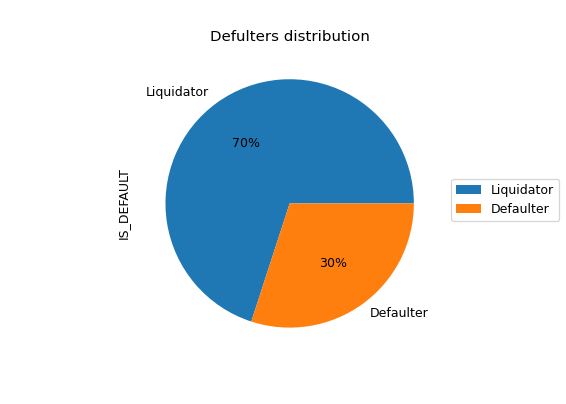

Text(0.5, 1.0, 'Defulters distribution')

In [14]:
fig = plt.figure(1,figsize=(7, 5))
ax1 = fig.add_subplot(111)

dataset['IS_DEFAULT'].value_counts().plot(kind='pie', autopct='%1.0f%%').legend(bbox_to_anchor=(1,0.6))
plt.title('Defulters distribution')

# Which credit programs are available?

In [15]:
pd.DataFrame(dataset['TRANSACTION_CATEGORY'].value_counts())

,TRANSACTION_CATEGORY
FURNITURE,5708491
EDUCATION,2121665
ELECTRONICS,1962777
RETRAINING,109512
USED CAR,95275
OTHER,1207
NEW CAR,1073


# Which one is the most requested?

<IPython.core.display.Javascript object>


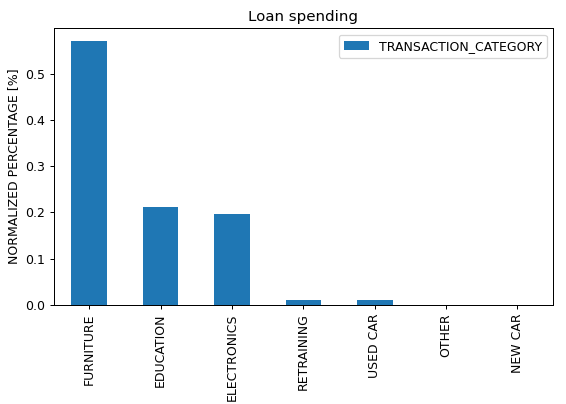

In [16]:
fig = plt.figure(2,figsize=(7, 5))
ax1 = fig.add_subplot(111)

dataset['TRANSACTION_CATEGORY'].value_counts(normalize=True).plot(kind='bar', stacked=True).legend()
plt.title('Loan spending')
plt.ylabel('NORMALIZED PERCENTAGE [%]')
fig.tight_layout()

* Almost 60% of the client use their loans to buy furniture, 21% for education and 20% to buy electronics

# There are two grups of clients: dafulters and liquidators

In [17]:
Defaulters = dataset.loc[dataset['IS_DEFAULT']=='Defaulter']
Liquidator = dataset.loc[dataset['IS_DEFAULT']=='Liquidator']

# How does they  use their loans

<IPython.core.display.Javascript object>


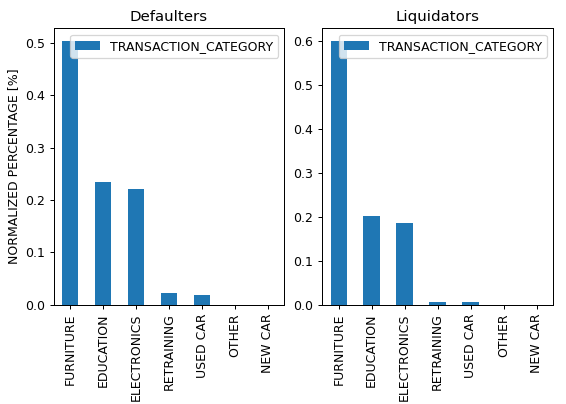

In [18]:
Defaulters_spending = Defaulters['TRANSACTION_CATEGORY']
Liquidator_spending = Liquidator['TRANSACTION_CATEGORY']
#print('----------------------')
#print ('Dafulters spendins:\n', Defaulters_spending.value_counts())
#print(' ')
#print ('Liquidator spendins:\n', Liquidator_spending.value_counts())

fig = plt.figure(3,figsize=(7, 5))
ax1 = fig.add_subplot(121)

Defaulters_spending.value_counts(normalize=True).plot(kind='bar', rot=90, stacked=True).legend()
plt.title('Defaulters')
plt.ylabel('NORMALIZED PERCENTAGE [%]')

ax2 = fig.add_subplot(122)
plt.title('Liquidators')
Liquidator_spending.value_counts(normalize=True).plot(kind='bar', rot=90, stacked=True).legend()

fig.tight_layout()

# What is the dafult rate by each individial credit program?

In [19]:
defaults_by_credit_program = dataset.groupby(['TRANSACTION_CATEGORY','IS_DEFAULT']).size()
#defaults_by_credit_program

In [20]:
percentages = defaults_by_credit_program.groupby(level=0).apply(lambda x:1 * x / float(x.sum()))
#percentages

In [21]:
dflt_rate=percentages.unstack()
#dflt_rate

In [22]:
dflt_rate_sort = dflt_rate.sort_values(by = ['Defaulter'], ascending = [False])
#flt_rate_sort

<IPython.core.display.Javascript object>


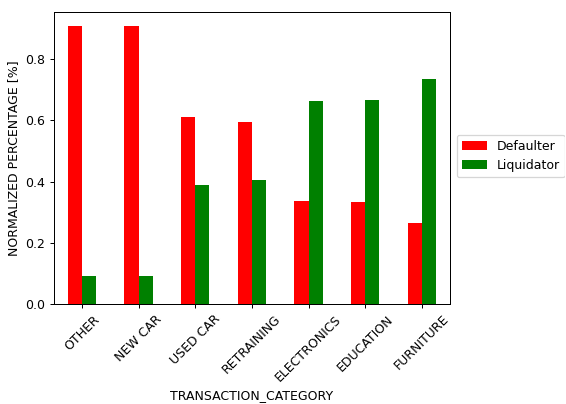

In [23]:
fig = plt.figure(4,figsize=(7, 5))
ax1 = fig.add_subplot(111)
dflt_rate_sort.plot.bar(rot=45, color=['red','green'], ax=ax1).legend(bbox_to_anchor=(1,0.6))
plt.ylabel('NORMALIZED PERCENTAGE [%]')
fig.tight_layout()

* Default rate by each program:

In [24]:
print((dflt_rate_sort*100).to_markdown(tablefmt="grid"))

+------------------------+-------------+--------------+
| TRANSACTION_CATEGORY   |   Defaulter |   Liquidator |
+========================+=============+==============+
| OTHER                  |     90.9693 |      9.03065 |
+------------------------+-------------+--------------+
| NEW CAR                |     90.8667 |      9.13327 |
+------------------------+-------------+--------------+
| USED CAR               |     61.0129 |     38.9871  |
+------------------------+-------------+--------------+
| RETRAINING             |     59.4255 |     40.5745  |
+------------------------+-------------+--------------+
| ELECTRONICS            |     33.6758 |     66.3242  |
+------------------------+-------------+--------------+
| EDUCATION              |     33.1763 |     66.8237  |
+------------------------+-------------+--------------+
| FURNITURE              |     26.4492 |     73.5508  |
+------------------------+-------------+--------------+


# Correlations of numerical varibleswithin defaulters

In [25]:
Defaulters = dataset.loc[dataset['IS_DEFAULT']=='Defaulter']

<IPython.core.display.Javascript object>


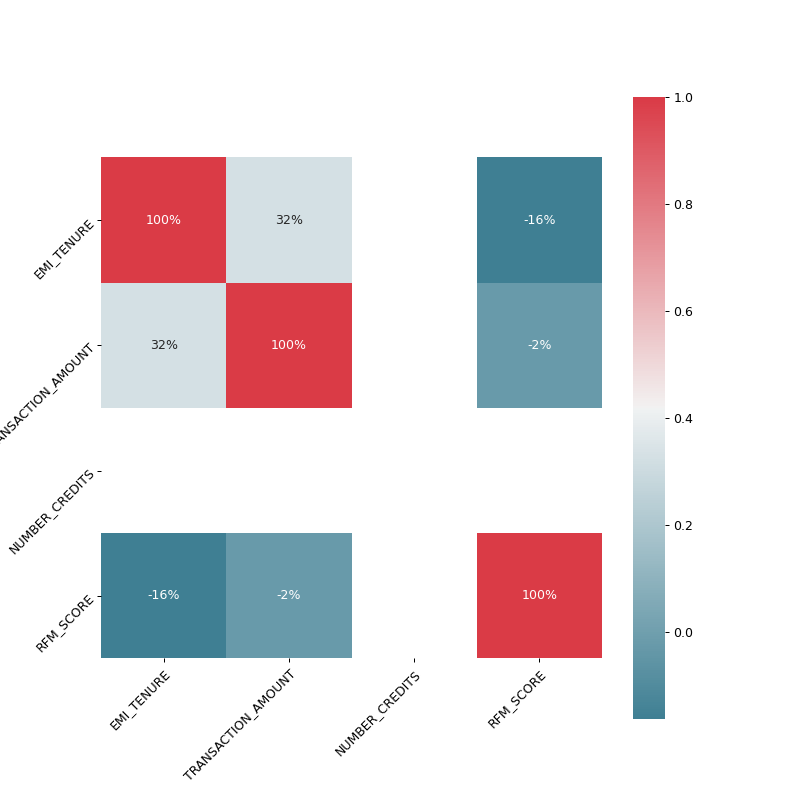

In [26]:
# Correlation matrix
corr  = Defaulters.corr()

f, ax = plt.subplots(num=5,figsize=(10, 10))
ax    = sns.heatmap(corr, annot=True, fmt ='.0%', mask= np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#fig.tight_layout()
plt.show()

* Within IS_DAFAULER=1 there is a correlation between EMI_TENURE and TRANSACTION_AMOUNT. EMI stands for Equated Monthly Installment.

# IMPACT OF LARGE SCALE BUSSINES: IS_STATE_BORDER VARIBLE

In [27]:
state_border  = dataset.groupby(['IS_STATE_BORDER','IS_DEFAULT']).size()
percentages_1 = state_border.groupby(level=0).apply(lambda x:1 * x / float(x.sum()))
state_border  = percentages_1.unstack().T
state_border

IS_STATE_BORDER,NO,YES
IS_DEFAULT,,
Defaulter,0.44294,0.015935
Liquidator,0.55706,0.984065


<IPython.core.display.Javascript object>


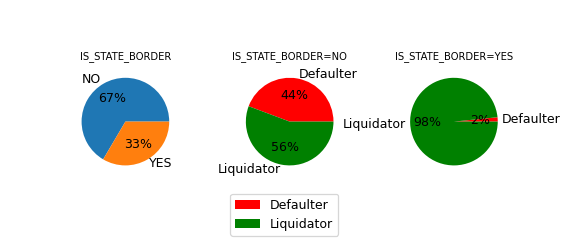

In [28]:
fig = plt.figure(7,figsize=(7, 3))

ax1 = fig.add_subplot(131)
dataset['IS_STATE_BORDER'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('IS_STATE_BORDER', fontsize=8)

ax1 = fig.add_subplot(132)
state_border['NO'].plot(kind='pie', autopct='%1.0f%%', colors=['red','green'])
plt.ylabel('')
plt.title('IS_STATE_BORDER=NO', fontsize=8)

ax1 = fig.add_subplot(133)
state_border['YES'].plot(kind='pie', autopct='%1.0f%%', colors=['red','green']).legend(bbox_to_anchor=(-0.5,-0.1))
plt.ylabel('')
plt.title('IS_STATE_BORDER=YES', fontsize=8)

plt.subplots_adjust(wspace=0.5, hspace=5)

* Large scale business (IS_STATE_BORDER=YES) have less chances to default

# IMPACT OF CO-APLICANT

In [29]:
coaplicant   = dataset.groupby(['HAS_CO_APPLICANT','IS_DEFAULT']).size()
percentage_2 = coaplicant.groupby(level=0).apply(lambda x: 1*x / float(x.sum()))
coaplicant   = percentage_2.unstack().T
coaplicant

HAS_CO_APPLICANT,NO,YES
IS_DEFAULT,,
Defaulter,0.297958,0.301673
Liquidator,0.702042,0.698327


<IPython.core.display.Javascript object>


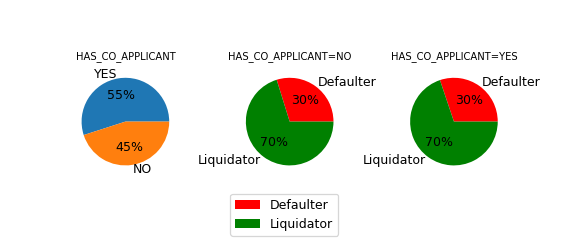

In [30]:
fig = plt.figure(8,figsize=(7, 3))

ax1 = fig.add_subplot(131)
dataset['HAS_CO_APPLICANT'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('HAS_CO_APPLICANT', fontsize=8)

ax1 = fig.add_subplot(132)
coaplicant['NO'].plot(kind='pie', autopct='%1.0f%%', colors=['red','green'])


plt.ylabel('')
plt.title('HAS_CO_APPLICANT=NO', fontsize=8)

ax1 = fig.add_subplot(133)
coaplicant['YES'].plot(kind='pie', autopct='%1.0f%%', colors=['red','green']).legend(bbox_to_anchor=(-0.5,-0.1))
plt.ylabel('')
plt.title('HAS_CO_APPLICANT=YES', fontsize=8)

plt.subplots_adjust(wspace=0.5, hspace=5)

* Co-applicant does not have a significant impact

# IMPACT OF CREDIT HISTORY

In [31]:
pd.DataFrame(dataset['CREDIT_HISTORY'].value_counts())

,CREDIT_HISTORY
EXISTING CREDITS PAID BACK,6236581
DELAY IN PAST,2915935
ALL CREDITS PAID BACK,794405
CRITICAL ACCOUNT,51747
NONE TAKEN,1332


<IPython.core.display.Javascript object>


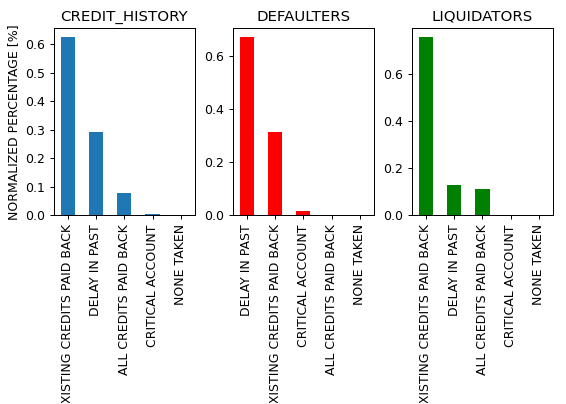

In [32]:
fig = plt.figure(9,figsize=(7, 5))
ax1 = fig.add_subplot(131)

dataset['CREDIT_HISTORY'].value_counts(normalize=True).plot(kind='bar', rot=90, stacked=True)#
plt.title('CREDIT_HISTORY')
plt.ylabel('NORMALIZED PERCENTAGE [%]')

ax1 = fig.add_subplot(132)
Defaulters['CREDIT_HISTORY'].value_counts(normalize=True).plot(kind='bar', rot=90, color=['red'])
plt.title('DEFAULTERS')

ax1 = fig.add_subplot(133)
Liquidator['CREDIT_HISTORY'].value_counts(normalize=True).plot(kind='bar', rot=90, color=['green'])
plt.title('LIQUIDATORS')

fig.tight_layout()

* Clients with DELAY IN PAST are more prone to default.
* Clients with ALL CREDITS PAID BACK are less prone to default.

In [33]:
credit_history = dataset.groupby(['CREDIT_HISTORY','IS_DEFAULT']).size()
percentages_3  = credit_history.groupby(level=0).apply(lambda x: 1*x / float(x.sum()))
credit_history = percentages_3.unstack().sort_values(by = ['Defaulter'], ascending = [False]).T

In [34]:
credit_history

CREDIT_HISTORY,CRITICAL ACCOUNT,DELAY IN PAST,EXISTING CREDITS PAID BACK,ALL CREDITS PAID BACK,NONE TAKEN
IS_DEFAULT,,,,,
Defaulter,0.961331,0.687978,0.150346,0.008191,0.003003
Liquidator,0.038669,0.312022,0.849654,0.991809,0.996997


In [35]:
dflt_rate_sort = dflt_rate.sort_values(by = ['Defaulter'], ascending = [False])


<IPython.core.display.Javascript object>


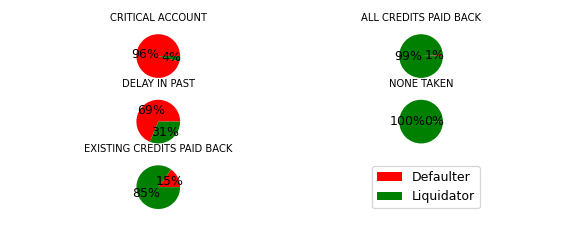

In [36]:
fig = plt.figure(10,figsize=(7, 3))

ax1 = fig.add_subplot(321)
credit_history['CRITICAL ACCOUNT'].plot(kind='pie', autopct='%1.0f%%', labeldistance=None, colors=['red','green'], label='')
plt.ylabel('')
plt.title('CRITICAL ACCOUNT', fontsize=8)

ax1 = fig.add_subplot(322)
credit_history['ALL CREDITS PAID BACK'].plot(kind='pie', autopct='%1.0f%%', labeldistance=None, colors=['red','green'], label='')
plt.ylabel('')
plt.title('ALL CREDITS PAID BACK', fontsize=8)

ax1 = fig.add_subplot(323)
credit_history['DELAY IN PAST'].plot(kind='pie', autopct='%1.0f%%', labeldistance=None, colors=['red','green'], label='')
plt.ylabel('')
plt.title('DELAY IN PAST', fontsize=8)

ax1 = fig.add_subplot(324)
credit_history['NONE TAKEN'].plot(kind='pie', autopct='%1.0f%%', labeldistance=None, colors=['red','green'], label='')
plt.ylabel('')
plt.title('NONE TAKEN', fontsize=8)

ax1 = fig.add_subplot(325)
credit_history['EXISTING CREDITS PAID BACK'].plot(kind='pie', autopct='%1.0f%%', labeldistance=None, colors=['red','green'], label='').legend(bbox_to_anchor=(6.5,1))
plt.ylabel('')
plt.title('EXISTING CREDITS PAID BACK', fontsize=8)

plt.subplots_adjust(wspace=.5, hspace=0.2)


* CRITICAL ACCOUNTS are highly risky to default.

In [37]:
history clear